# Elias Villaseñor Flores
## 1735689
## Estadística aplicada
## Grupo 051

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datos= pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')

In [3]:
datos

,checking_account_status,duration,credit_history,purpose,amount,savings_account_status,employment_years,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,number_of_credits,job,people_liable,telephone,foreign_worker,full_repaid
0,below_0,6,critical_account,radio_TV,1169,unknown,above_7,4,M_single,None,...,real_estate,67,None,own,2,official,1,1,1,1
1,0_to_200,48,existing_credit_paid,radio_TV,5951,below_100,between_1_4,2,F_not_single,None,...,real_estate,22,None,own,1,official,1,0,1,0
2,no_account,12,critical_account,education,2096,below_100,between_4_7,2,M_single,None,...,real_estate,49,None,own,1,unskilled,2,0,1,1
3,below_0,42,existing_credit_paid,furniture_equipment,7882,below_100,between_4_7,2,M_single,guarantor,...,life_insurance,45,None,free,1,official,2,0,1,1
4,below_0,24,delay_in_paying,car_new,4870,below_100,between_1_4,3,M_single,None,...,no_property,53,None,free,2,official,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_account,12,existing_credit_paid,furniture_equipment,1736,below_100,between_4_7,3,F_not_single,None,...,real_estate,31,None,own,1,unskilled,1,0,1,1
996,below_0,30,existing_credit_paid,car_used,3857,below_100,between_1_4,4,M_divorced,None,...,life_insurance,40,None,own,1,management,1,1,1,1
997,no_account,12,existing_credit_paid,radio_TV,804,below_100,above_7,4,M_single,None,...,other,38,None,own,1,official,1,0,1,1
998,below_0,45,existing_credit_paid,radio_TV,1845,below_100,between_1_4,4,M_single,None,...,no_property,23,None,free,1,official,1,1,1,0


In [4]:
from lifelines import CoxPHFitter

In [5]:
cph= CoxPHFitter()
cph.fit(datos, 'duration', 'full_repaid', formula='C(foreign_worker)+number_of_credits+C(housing)+telephone+age+C(personal_status)')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'duration'
                event col = 'full_repaid'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4227.21
         time fit was run = 2022-10-16 02:24:58 UTC

---
                                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                
C(foreign_worker)[T.1]            -1.15       0.32       0.18            -1.51            -0.80                 0.22                 0.45
C(housing)[T.own]                  0.73       2.08       0.14             0.46             1.00                 1.58                 2.73
C(housing)[T.rent]                 0.62       1.85       0.17             0.29             0.95                 1.33                 2.57
C(personal_status)[T.M_divorced]   0.02       1.02       0.12            -0.22             0.27                 0.80                 1.31
C(personal_status)[T.M_single]    -0.06       0.94       0.09            -0.24             0.12                 0.79                 1.13
age                                0.02       1.02       0.00             0.01             0.02                 1.01                 1.02
number_of_credits                  0.06       1.06       0.07            -0.07             0.19                 0.93                 1.21
telephone                         -0.23       0.80       0.08            -0.38            -0.08                 0.68                 0.93

                                   cmp to     z      p   -log2(p)
covariate                                                        
C(foreign_worker)[T.1]               0.00 -6.35 <0.005      32.09
C(housing)[T.own]                    0.00  5.28 <0.005      22.88
C(housing)[T.rent]                   0.00  3.67 <0.005      12.01
C(personal_status)[T.M_divorced]     0.00  0.19   0.85       0.24
C(personal_status)[T.M_single]       0.00 -0.64   0.52       0.94
age                                  0.00  4.60 <0.005      17.83
number_of_credits                    0.00  0.90   0.37       1.44
telephone                            0.00 -2.93 <0.005       8.20
---
Concordance = 0.61
Partial AIC = 8470.41
log-likelihood ratio test = 84.36 on 8 df
-log2(p) of ll-ratio test = 47.14

# se escogeran las variables de age, housing, personal_status, foreign_worker, number_of_credits, telephone
## creo que estas variables afectan en sentido que, la edad puede afectar en la movilidad de la persona para ir a pagar, el housing es importante debido a que nos dice la capacidad de una persona para pagar una casa, estatus personal debido a que una persona casada, divorciada o soltera tiene capacidad diferente para pagar un adeudo, trabajador extrangero debido a que tal vez viaje seguido y no tenga tiempo de ir a pagar, numero de creditos debido a que entre mas tenga, mas dificil seria pagar y telefono ya que si no tiene, no se podran comunicar con el para recordarle que debe pagar el monto pronto y se le olvide la fecha.

# age
### H0: Bage = 0
### H0: Bage =/ 0
### Como pValor < .005 se rechaza H0 por lo tanto age si tiene efecto en el riesgo de pagar el adeudo
### debido a que el coef de age es positivo, esto nos dice que a mayor edad, aumenta el riesgo de pagar el adeudo

# foreign_worker
### H0: Bforeign_worker = 0
### H0: Bforeign_worker =/ 0
### Como pValor < .005 se rechaza H0 por lo tanto age si tiene efecto en el riesgo de pagar el adeudo
### Debido a que el signo del coef de foreign_worker es negativo, esto nos dice que si no es extrangero, disminuye el ruesgo de pagar el adeudo

# housing T.own
### H0: Bhousing = 0
### H0: Bhousing =/ 0
### Como pValor < .005 se rechaza H0 por lo tanto T.own si tiene efecto en el riesgo de pagar en comparacion con T.free

# housing T.rent
### H0: Bhousing = 0
### H0: Bhousing =/ 0
### Como pValor < .005 se rechaza H0 por lo tanto T.rent si tiene efecto en el riesgo de pagar en comparacion con T.free

# Number_of_credits
### H0: Bnumber_of_credits = 0
### H0: Bnumber_of_credits =/ 0
### Como pValor > .005 NO se rechaza H0 por lo tanto number_of_credits no tiene efecto en el riesgo de pagar el adeudo.

# personal_status T.M single
### H0: Bpersonal_status = 0
### H0: Bpersonal_status =/ 0
### Como pValor > .005 NO se rechaza H0 por lo tanto personal_status T.M single no tiene efecto en el riesgo de pagar el adeudo en comparación con T.M not_single

# personal_status T.M divorced
### H0: Bpersonal_status = 0
### H0: Bpersonal_status =/ 0
### Como pValor > .005 NO se rechaza H0 por lo tanto personal_status T.M single no tiene efecto en el riesgo de pagar el adeudo en comparación con T.M not_single

# telephone
### H0: Btelephone = 0
### H0: Btelephone =/ 0
### Como pValor < .005 se rechaza H0 por lo tanto telephone si tiene efecto en el riesgo de pagar el adeudo

# Conclusión general
### No estaba muy equivocado al creer que estas 6 variables tendrian efecto en el riesgo de pagar, me equivoque en el number_of_credits y personal_status, al parecer no hay cambios en si una persona tiene 0, 1 o mas creditos en su capacidad de pagar el adeudo, tampoco en si una persona esta casada o divorciada en comparacion con una persona soltera.

### En las demas variables tenia razon, en telephone, por lo mismo que habia comentado anteriormente, algunas personas olvidan que deben pagar algun adeudo debido a que tiene otras cosas que hacer, y si no tiene telefono, no podra ser avisado que debe pagar el adeudo. Housing, debido a que una persona que paga su casa propia o renta alguna casa, tiene efecto en el riesgo de pagar el prestamo en comparacion con una persona que vive libre en una casa. Foreign_worker debido a que una persona que vive en el extrangero es un poco mas dificil de contacar, por lo tanto hay efecto en su capacidad de pagar el adeudo. Y por ultimo age, debido a que una persona joven tiene una capacidad diferente de pagar el adeudo a comparacion de una persona mucho mayor.

### Como posible solución se espera que la institucion financiera piense mejor a quien darle un prestamo para disminuir el riesgo en pagar el adeudo, por ejemplo, tratar de darle prestamo a foraneos solo si tienen buen historial crediticio en el mismo lugar donde de hizo el prestamo. Tratar de no darle prestamos a personas de muy mayor edad o tratar de asegurar un aval joven, al igual con buen historial crediticio. Tratar de obtener 2 o mas telefonos de todas las personas que pidan un prestamo para poder tener la capacidad de contactar al cliente de varias formas, numeros personales, de algun familiar, del trabajo, etc. Tratar de investigar los pagos que hace una persona divorciada respecto a su ex esposa o posibles hijos, ya que esto podria afectar en la capacidad de pagar un prestamo, al igual que una persona casada, ya que si tiene uno o mas hijos podria afectar su capacidad para pagar el adeudo.

# Correcion del problema 1 b), c) y d) ya que no habia hecho el log-normal, por lo tanto se corrigio donde nos pedian conclusiones de log-normal en el problema 3 y 4

In [9]:
#b)
from lifelines import WeibullFitter as wb
from lifelines import LogNormalFitter as log

In [10]:
wbf = wb().fit(datos['duration'], datos['full_repaid'])
wbf.hazard_

,Weibull_estimate
4.000000,0.014869
4.136273,0.015225
4.272545,0.015578
4.408818,0.015928
4.545090,0.016275
...,...
71.454910,0.114210
71.591182,0.114364
71.727455,0.114518
71.863727,0.114672


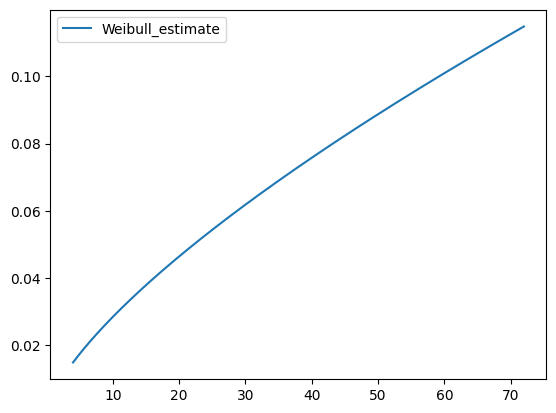

In [11]:
wbf.hazard_.plot();

In [12]:
logf = log().fit(datos['duration'], datos['full_repaid'])
logf.hazard_

,LogNormal_estimate
4.000000,0.007982
4.136273,0.008671
4.272545,0.009375
4.408818,0.010091
4.545090,0.010819
...,...
71.454910,0.043464
71.591182,0.043430
71.727455,0.043395
71.863727,0.043361


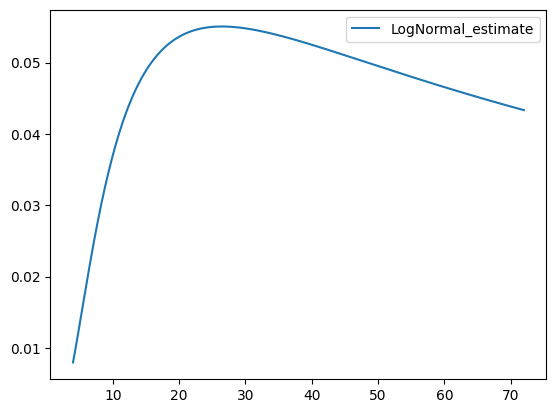

In [13]:
logf.hazard_.plot();

# c)
### Significa que entre mas dinero pidan prestado, mas tiempo tardan en pagar

# d)
### La grafica log normal nos dice que entre mas pidan prestado, mayor tiempo tardan en pagar, pero en este caso, se llega a un punto en el que el riesgo se normaliza 

In [15]:
#3
from lifelines import KaplanMeierFitter 

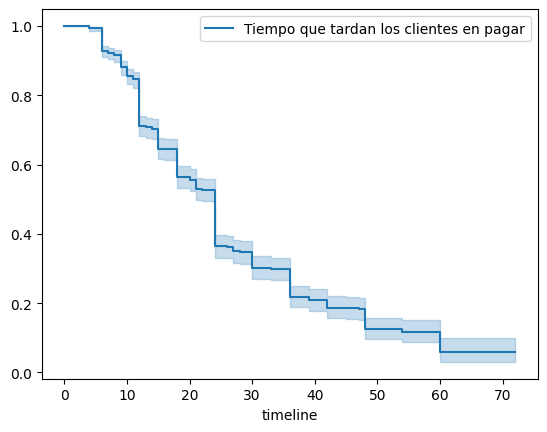

In [16]:
kmf = KaplanMeierFitter(label="Tiempo que tardan los clientes en pagar")
kmf.fit(datos['duration'], datos['full_repaid'])
kmf.plot();

In [17]:
kmf.survival_function_ 

,Tiempo que tardan los clientes en pagar
timeline,
0.0,1.000000
4.0,0.994000
5.0,0.993000
6.0,0.927000
7.0,0.921951
8.0,0.915892
9.0,0.880510
10.0,0.854824
11.0,0.845544


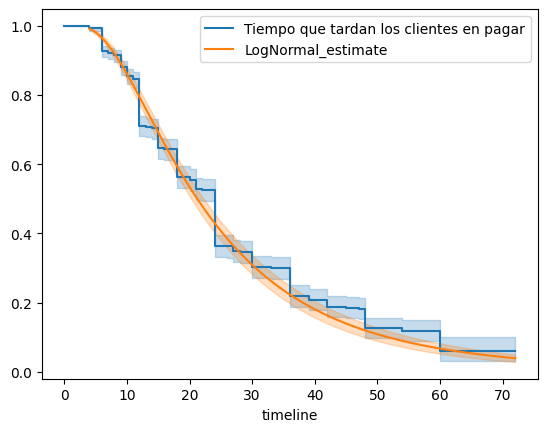

In [18]:
kmf.plot();
logf.plot_survival_function();

# 4
### Las graficas se parecen mucho, difiere en que el Kaplan Meier esta en forma de escalera y en algunos puntos es mayor y menor que el log normal